<h1>Dataset Expansion Using Image Augmentation <span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-Modules" data-toc-modified-id="Importing-the-Modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the Modules</a></span></li><li><span><a href="#Define-the-augmentations-for-apply-to-the-images" data-toc-modified-id="Define-the-augmentations-for-apply-to-the-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define the augmentations for apply to the images</a></span></li><li><span><a href="#Read-image-paths" data-toc-modified-id="Read-image-paths-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read image paths</a></span></li><li><span><a href="#Image-Augmentation" data-toc-modified-id="Image-Augmentation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Augmentation</a></span></li><li><span><a href="#Mask-Augmentation" data-toc-modified-id="Mask-Augmentation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mask Augmentation</a></span></li><li><span><a href="#Result-visualization" data-toc-modified-id="Result-visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Result visualization</a></span></li></ul></div>

### Importing the Modules

In [36]:
import albumentations
import pandas as pd
import cv2
import os
import random
import numpy as np
import argparse
import matplotlib.pyplot as plt
from tqdm import tqdm
from imutils import paths
from PIL import Image

### Define the augmentations for apply to the images

In [3]:
aug = albumentations.Compose([
                albumentations.Resize(490, 490, always_apply=True),
                albumentations.HorizontalFlip(p=1.0),
                albumentations.RandomRotate90(),
                albumentations.GaussNoise(var_limit=(10, 1000), p=1),
                albumentations.Transpose(p=1),
                albumentations.ShiftScaleRotate(
                    shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=1.0)
            ])

### Read image paths

In [47]:
img_path = '/Users/alexeyfilichkin/Desktop/PyTorch/UNET/models_kia'
mask_path = '/Users/alexeyfilichkin/Desktop/PyTorch/UNET/masks_kia'

In [48]:
image_paths = list(paths.list_images(img_path))
masks_paths = list(paths.list_images(mask_path))

In [49]:
print(image_paths[:1])
print(masks_paths[:1])

['/Users/alexeyfilichkin/Desktop/PyTorch/UNET/models_kia/k5_4.png']
['/Users/alexeyfilichkin/Desktop/PyTorch/UNET/masks_kia/picanto_mask_4.png']


In [50]:
print(len(image_paths))
print(len(masks_paths))

44
44


In [57]:
image_lst = os.listdir(img_path)
image_lst = sorted(image_lst)
image_lst.remove('.DS_Store')

In [58]:
mask_lst = os.listdir(mask_path)
mask_lst = sorted(mask_lst)
mask_lst.remove('.DS_Store')

In [59]:
def show_images(imgs_lst, masks_lst, loops=2):
    for i in range(loops):
        img_path = os.path.join('/Users/alexeyfilichkin/Desktop/PyTorch/UNET/models_kia', imgs_lst[i])
        mask_path = os.path.join('/Users/alexeyfilichkin/Desktop/PyTorch/UNET/masks_kia', masks_lst[i])
        img = Image.open(img_path)
        mask = Image.open(mask_path)
        print(img_path)
        print(img.size)
        print(type(img))
        plt.imshow(img)
        plt.show()
        print(mask_path)
        print(mask.size)
        plt.imshow(mask)
        plt.show()
        print("----------------------------------------------------")

/Users/alexeyfilichkin/Desktop/PyTorch/UNET/models_kia/carnival_1.png
(980, 551)
<class 'PIL.PngImagePlugin.PngImageFile'>


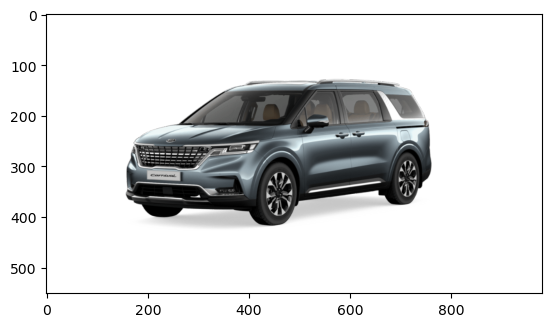

/Users/alexeyfilichkin/Desktop/PyTorch/UNET/masks_kia/carnival_mask_1.png
(980, 551)


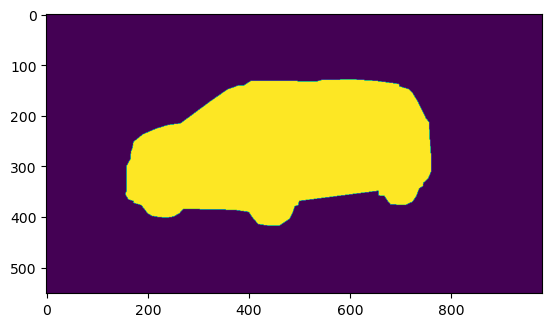

----------------------------------------------------
/Users/alexeyfilichkin/Desktop/PyTorch/UNET/models_kia/carnival_2.png
(980, 551)
<class 'PIL.PngImagePlugin.PngImageFile'>


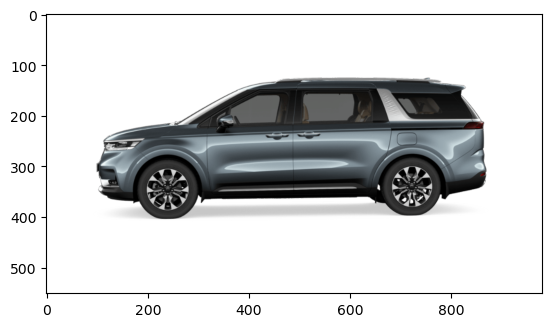

/Users/alexeyfilichkin/Desktop/PyTorch/UNET/masks_kia/carnival_mask_2.png
(980, 551)


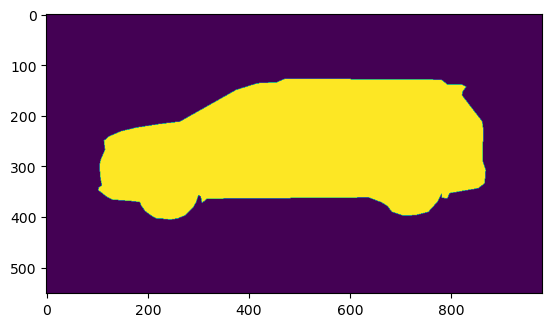

----------------------------------------------------


In [60]:
show_images(image_lst, mask_lst)

### Image Augmentation 

In [61]:
labels = []
masks = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label not in labels:
        labels.append(label)
for mask_path in masks_paths:
    mask = mask_path.split(os.path.sep)[-2]
    if mask not in masks:
        masks.append(mask)

        print(labels)
print(masks)

['models_kia']
['masks_kia']


In [62]:
for m in [1, 3, 5, 7, 9, 11]:
    random.seed(m)
    
    for i, label in tqdm(enumerate(labels), total=len(labels)):
        path = '/Users/alexeyfilichkin/Desktop/PyTorch/UNET/'
        images = os.listdir(path+label)
        images.remove('.DS_Store')
        for i in range(len(images)):
            if images[i].split('.')[-1] != 'gif':
                image = cv2.imread(f"{path+label}/{images[i]}")
                name = images[i].split('.')[-2]
                aug_image = aug(image=np.array(image))['image']
                cv2.imwrite((f"{path}/model_data_train/aug_{m}_{name}.png"), aug_image)

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.10s/it]


### Mask Augmentation

In [63]:
for m in tqdm([1, 3, 5, 7, 9, 11]):
    random.seed(m)
    path = '/Users/alexeyfilichkin/Desktop/PyTorch/UNET/masks_kia'
    masks_images = os.listdir(path)
    masks_images.remove('.DS_Store')
        
    for k in range(len(masks_images)):
        mask = cv2.imread(f'{path}/{masks_images[k]}')
        name = masks_images[k].split('.')[-2]
        aug_mask = aug(image=np.array(mask))['image']
        cv2.imwrite((
            f'/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train_masks/aug_{m}_{name}.png'),
            aug_mask
        )

100%|█████████████████████████████████████████████| 6/6 [00:05<00:00,  1.01it/s]


### Result visualization

In [64]:
img_aug_path = '/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train'
mask_aug_path = '/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train_masks'

In [73]:
image_aug_lst = os.listdir(img_aug_path)
image_aug_lst = sorted(image_aug_lst)
image_aug_lst.remove('.DS_Store')
image_aug_lst = sorted(image_aug_lst)

In [74]:
mask_aug_lst = os.listdir(mask_aug_path)
mask_aug_lst = sorted(mask_aug_lst)
mask_aug_lst.remove('.DS_Store')
mask_aug_lst = sorted(mask_aug_lst)

In [75]:
def show_images(imgs_lst, masks_lst, loops=2):
    for i in range(loops):
        img_path = os.path.join('/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train', imgs_lst[i])
        mask_path = os.path.join('/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train_masks', masks_lst[i])
        img = Image.open(img_path)
        mask = Image.open(mask_path)
        print(img_path)
        print(img.size)
        print(type(img))
        plt.imshow(img)
        plt.show()
        print(mask_path)
        print(mask.size)
        plt.imshow(mask)
        plt.show()
        print("----------------------------------------------------")

/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train/aug_11_carnival_1.png
(490, 490)
<class 'PIL.PngImagePlugin.PngImageFile'>


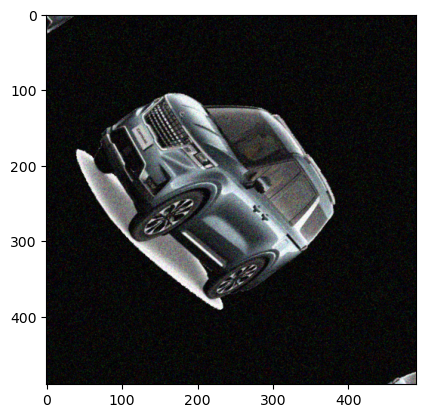

/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train_masks/aug_11_carnival_mask_1.png
(490, 490)


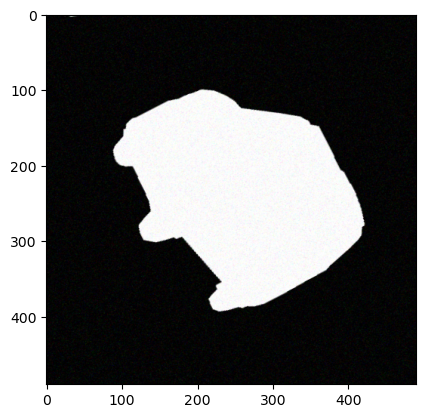

----------------------------------------------------
/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train/aug_11_carnival_2.png
(490, 490)
<class 'PIL.PngImagePlugin.PngImageFile'>


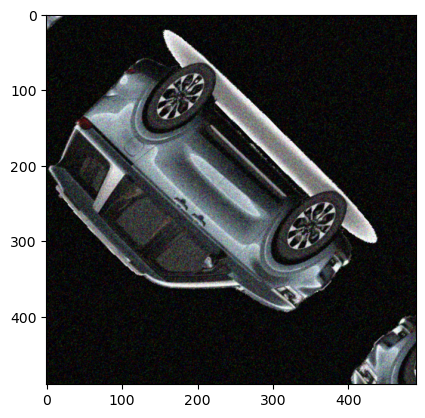

/Users/alexeyfilichkin/Desktop/PyTorch/UNET/model_data_train_masks/aug_11_carnival_mask_2.png
(490, 490)


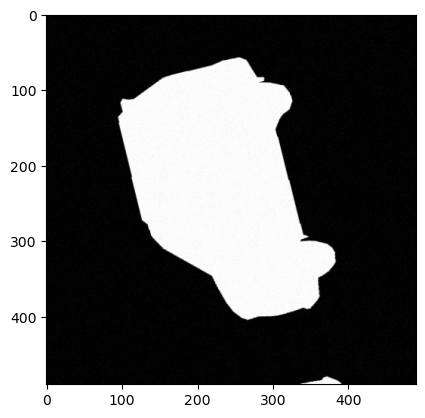

----------------------------------------------------


In [76]:
show_images(image_aug_lst, mask_aug_lst)